The matrix A(coefficient matrix) for 5 variable is [[ 6.44283056e-18]
 [-2.42800796e-01]
 [-1.32007463e-16]
 [ 1.12205556e+00]
 [ 1.89941202e-16]]
The matrix A(coefficient matrix) for 10 variable is [[ 1.42786660e-03]
 [ 3.63876155e-17]
 [-7.78219252e-02]
 [-8.82227362e-16]
 [ 6.68330583e-01]
 [ 4.90198539e-15]
 [-1.98671456e+00]
 [-9.03033666e-15]
 [ 2.39036842e+00]
 [ 5.11018724e-15]]
The matrix A(coefficient matrix) for 20 variable is [[-9.08991409e-06]
 [-7.80473731e-12]
 [ 8.17685302e-04]
 [ 2.89323231e-10]
 [-9.35580751e-03]
 [-3.20622053e-09]
 [ 5.33931487e-03]
 [ 1.60562928e-08]
 [ 2.77822832e-01]
 [-4.17150264e-08]
 [-1.20803909e+00]
 [ 5.66078251e-08]
 [ 1.70022347e+00]
 [-3.19742980e-08]
 [ 3.70923143e-01]
 [-8.14814980e-09]
 [-3.36675098e+00]
 [ 1.82315422e-08]
 [ 3.22898149e+00]
 [-6.13345399e-09]]


Text(0.5, 1.0, 'degrees vs optimal cost')

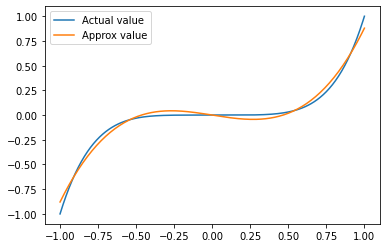

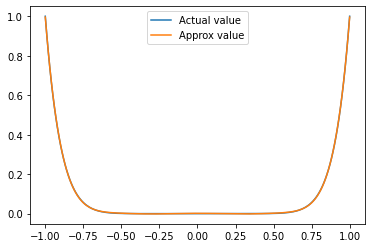

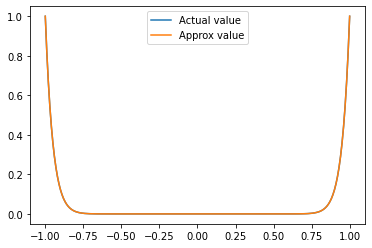

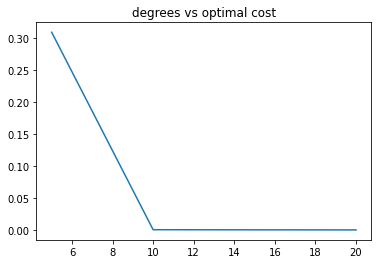

In [3]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
#The Above code is for the plotting and seeing the variation in approximation of various orders of polynomial. 
#Below code is only for the l = 2 norm case.

arr_n = [5,10,20]
cost_arr = []

for n in arr_n:
  #Declaration of the Variable in array of a0,a1,a2.....
  a = cp.Variable([n,1])

  #Parameter Declaration
  N = 100;
  #No. of Equally spaced N points 
  M = 2*N+1;
  #Equally spaced N Pinits are stored in xn
  xn = np.linspace(-1,1,M)

  #Declaration of empty array that can contain ith power of xn
  xni = []

  #filing the vslue of xn to the power i in the empty array that is declared above
  for i in range(n):
    xni.append(xn**i)
  #Making xni a numpy array
  xni = np.array(xni)

  #this is the gtarget function x^n that we wish to approximate
  fx = np.power(xn,n).reshape(1,M)

  #Cost Function
  cost = cp.sum_squares(fx-a.T@xni)

  prob = cp.Problem(cp.Minimize(cost))
  
  #plotting
  prob.solve()
  print("The matrix A(coefficient matrix) for",n,"variable is",a.value,end='\n')
  plt.figure()
  plt.plot(xn,fx.T,label='Actual value')
  plt.plot(xn,(a.value.T@xni).T,label='Approx value')
  plt.legend()
  cost_arr.append(cost.value)

cost_arr=np.array(cost_arr)
plt.figure()
plt.plot(arr_n,cost_arr)
plt.title("Order vs optimal cost")


The matrix A(coefficient matrix) for 5 variable is [[-8.31515845e-22]
 [-1.89225000e-01]
 [ 2.71569377e-17]
 [ 1.00690000e+00]
 [-7.37739142e-17]]
The matrix A(coefficient matrix) for 10 variable is [[ 1.00281966e-03]
 [ 3.37484497e-18]
 [-6.16274578e-02]
 [ 3.11196546e-17]
 [ 5.68114389e-01]
 [-1.15535794e-16]
 [-1.79310458e+00]
 [ 1.96965329e-16]
 [ 2.27569998e+00]
 [-3.87542482e-17]]
The matrix A(coefficient matrix) for 20 variable is [[-8.91269868e-07]
 [-1.34785290e-08]
 [ 2.18087397e-04]
 [ 5.53263724e-07]
 [-7.98313662e-03]
 [-7.91836309e-06]
 [ 1.10553584e-01]
 [ 5.58587275e-05]
 [-7.69118266e-01]
 [-2.23265376e-04]
 [ 3.05240425e+00]
 [ 5.38927917e-04]
 [-7.33806074e+00]
 [-8.00750984e-04]
 [ 1.08753994e+01]
 [ 7.16051424e-04]
 [-9.70872497e+00]
 [-3.53343267e-04]
 [ 4.78529725e+00]
 [ 7.39012812e-05]]


Text(0.5, 1.0, 'Order vs optimal cost')

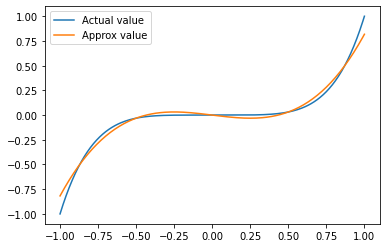

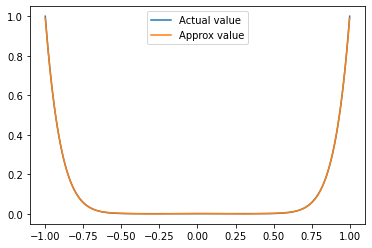

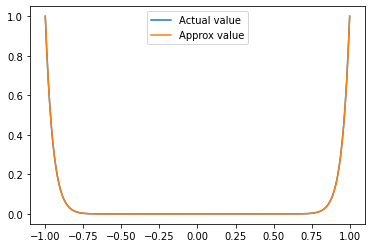

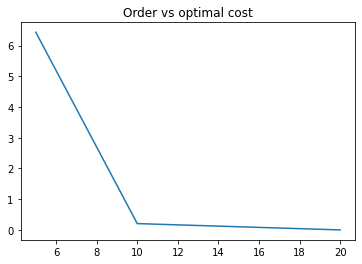

In [5]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

arr_n = [5,10,20]
cost_arr = []

for n in arr_n:
  #Declaration of the Variable in array of a0,a1,a2.....
  a = cp.Variable([n,1])

  #Parameter Declaration
  N = 100;
  M = 2*N+1;
  xn = np.linspace(-1,1,M)

  xni = []

  for i in range(n):
    xni.append(xn**i)

  xni = np.array(xni)


  fx = np.power(xn,n).reshape(1,M)

  #Cost Function
  cost = cp.sum(cp.abs(fx-a.T@xni))

  prob = cp.Problem(cp.Minimize(cost))
  
  #plotting
  prob.solve()
  print("The matrix A(coefficient matrix) for",n,"variable is",a.value,end='\n')
  plt.figure()
  plt.plot(xn,fx.T,label='Actual value')
  
  plt.plot(xn,(a.value.T@xni).T,label='Approx value')
  plt.legend()
  cost_arr.append(cost.value)

cost_arr=np.array(cost_arr)
plt.figure()
plt.plot(arr_n,cost_arr)
plt.title("Order vs optimal cost")


